KNNRegressor: a custom built class implementation for the k nearest neighbors logic.

src.shared imports: \
numpy as np \
pandas as pd \
matplotlib.pyplot as plt \
utils like load_dataset, calculating metrics, etc.

In [13]:
import sys
from pathlib import Path

project_root = str(Path.cwd().parents[1])

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.regression.knn import KNNRegressor
from src.shared import *

I chose a classic dataset suitable for regression. \
The Diabetes dataset fits this criterion well and is perfect for demonstrating the k-nearest-neighboars regressor.

A table of features correlations with diabetes progression:
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Progress, dtype: float64


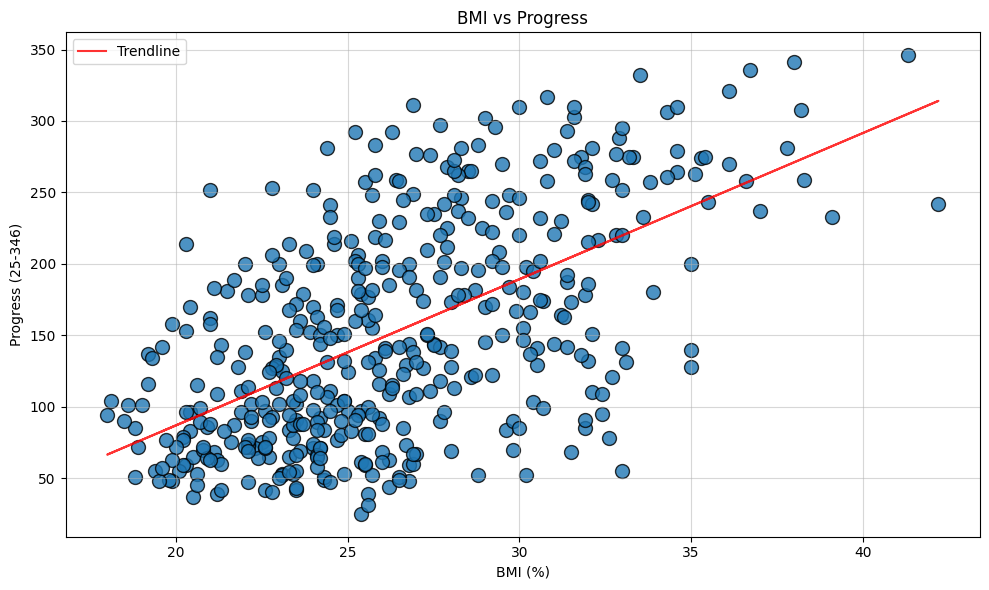

In [14]:
# --- 1. Load Data ---
df = load_dataset('diabetes')


# --- 2. Data Cleaning ---
# No cleaning but renaming the target column from Y to "Progress" for readabillity.
df.rename(columns={'Y': 'Progress'}, inplace=True)


# --- 3. Analysis ---
correlations = df.corr()['Progress'].sort_values(ascending=False).drop('Progress')
print("A table of features correlations with diabetes progression:")
print(correlations)

# Best correlation is BMI %


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

plt.scatter(
    x=df['BMI'],
    y=df['Progress'],
    edgecolors='black',
    alpha=0.8,
    s=100
)

plt.title("BMI vs Progress")
plt.xlabel("BMI (%)")
plt.ylabel("Progress (25-346)")

m, b = np.polyfit(df['BMI'], df['Progress'], 1)
plt.plot(df['BMI'], m*df['BMI'] + b, color='red', alpha=0.8, label=f'Trendline')

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# We can see that SEX, S2 and AGE have really low correlation. This means they are practically "noise".

In [15]:
# --- 1. Select Features & Target ---
X = df.drop(columns=['Progress'], axis=1).values
y = df['Progress'].values


# --- 2. Split Data for training & testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


# Normalizing features to 0-1 range is a MUST to allow the model to treat all features appropriately no matter the scale.
train_min = X_train.min(axis=0)
train_range = X_train.max(axis=0) - train_min + 1e-15

X_train = (X_train - train_min) / train_range
X_test = (X_test - train_min) / train_range


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = KNNRegressor()
model.fit(X_train, y_train) # so called 'training' (storing the data)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

print("\n--- Testing Results ---")
predictions = model.predict(X_test, k=5)


mae = Metrics.mae(y_test, predictions)

print(f"On average, the model's guess is off by: {mae:,.2f}")
print(f"Error percentage: {mae / np.mean(y_test) * 100:.2f}%")

Training on 354 samples
Testing on 88 samples

--- Testing Results ---
On average, the model's guess is off by: 48.35
Error percentage: 31.10%


We can see that the results aren't very good.. \
We can try to fix this problem by using a weighted version of the KNN regressor. \
I have already added this feature for the predict function, it is just disabled by default. 

In [16]:
predictions = model.predict(X_test, k=5, weighted=True)

mae = Metrics.mae(y_test, predictions)

print(f"On average, the model's guess is off by: {mae:,.2f}")
print(f"Error percentage: {mae / np.mean(y_test) * 100:.2f}%")

On average, the model's guess is off by: 47.83
Error percentage: 30.77%


Although the results aren't much better, this is progress! \
For this particular dataset, the linear regression does better.. but that's not always the case! \
Each problem has a model that fits better.. you just have to use the right one.

In [17]:
from src.regression.linear import LinearRegressor
model = LinearRegressor()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = Metrics.mae(y_test, predictions)

print(f"On average, the model's guess is off by: {mae:,.2f}")
print(f"Error percentage: {mae / np.mean(y_test) * 100:.2f}%")

On average, the model's guess is off by: 40.72
Error percentage: 26.20%
